Data set 1:https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

Data set :https://www.kaggle.com/datasets/ziya07/transaction-data-for-banking-operations

# **1.Import library**

In [ ]:

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supaya grafik muncul langsung
%matplotlib inline

# **2.Konek ke google**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3.Apploud Dataset 1 dan 2**

In [ ]:
import pandas as pd

data1 = pd.read_csv('/content/drive/MyDrive/EDA_Datmining/Transactions_Bank/Transactions_Bank.csv')
data2 = pd.read_csv('/content/drive/MyDrive/EDA_Datmining/ForFraud_Detection_Bank/ForFraud_Detection_Bank.csv')

 **Data Cleaning**

# **4.Bersihkan data set**

In [ ]:
# Bersihkan data
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()


In [ ]:
data1 = data1.drop_duplicates()
data2 = data2.drop_duplicates()

# **5.Mengkonversi data set kotor**

In [ ]:
print("===== Data Normal (Kotor) =====")
print(df_normal_raw.head())

print("\n===== Data Fraud (Kotor) =====")
print(df_fraud_raw.head())

===== Data Normal (Kotor) =====
  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              13.45 2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Do

# **6.Mengkonversi dataset bersih**

In [ ]:
# Konversi tanggal
for df in [df_normal, df_fraud]:
    if 'TransactionDate' in df.columns:
        df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
    if 'PreviousTransactionDate' in df.columns:
        df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

# Konversi ke numerik
for col in ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']:
    for df in [df_normal, df_fraud]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus duplikat
df_normal.drop_duplicates(inplace=True)
df_fraud.drop_duplicates(inplace=True)

# Tambahkan label
df_normal['Label'] = 'Normal'
df_fraud['Label'] = 'Fraud'

# Gabungkan
df_all = pd.concat([df_normal, df_fraud], ignore_index=True, sort=False)
print("✅ Data berhasil dibersihkan dan digabung")


✅ Data berhasil dibersihkan dan digabung


In [ ]:
df_all.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Label,Month
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Normal,2023-04
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Normal,2023-06
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Normal,2023-07
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Normal,2023-05
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,Normal,2023-10


# **7.Dataset numerik**

In [ ]:
# Pastikan dataset numerik
num_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']
num_cols = [c for c in num_cols if c in df_all.columns]

In [ ]:
# Analisis statistik deskriptif
num_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']
num_cols = [c for c in num_cols if c in df_all.columns]

print("📊 Statistik Deskriptif:")
display(df_all[num_cols].describe())

📊 Statistik Deskriptif:


,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge
count,5002.000000,5002.000000,5007.000000,5001.000000,5010.000000
mean,297.667513,119.594962,1.123627,5115.897395,44.659481
std,292.182518,69.966909,0.599719,3898.864359,17.803575
min,0.260000,10.000000,1.000000,101.250000,18.000000
25%,81.510000,63.000000,1.000000,1504.640000,27.000000
50%,211.270000,112.500000,1.000000,4735.610000,45.000000
75%,413.797500,161.000000,1.000000,7677.760000,59.000000
max,1919.110000,300.000000,5.000000,14977.990000,80.000000


**Univariate Analysis**

1. Distribusi Nilai Transaksi (TransactionAmount)

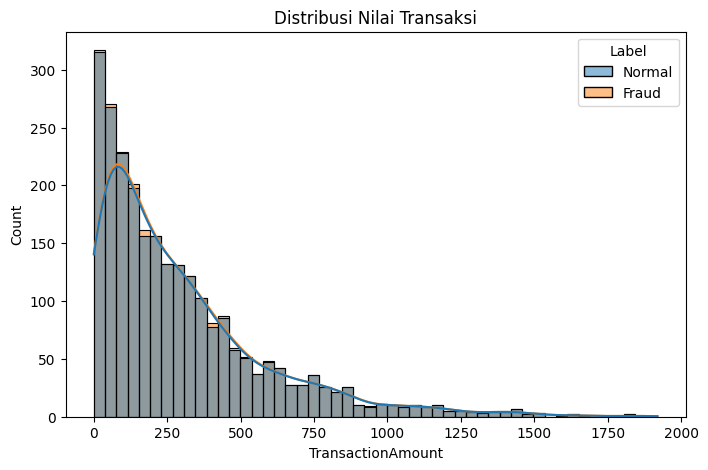

In [ ]:

# Distribusi nilai transaksi
if 'TransactionAmount' in df_all.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df_all, x='TransactionAmount', hue='Label', kde=True)
    plt.title('Distribusi Nilai Transaksi')
    plt.show()


2. Perbandingan Durasi Transaksi (TransactionDuration)

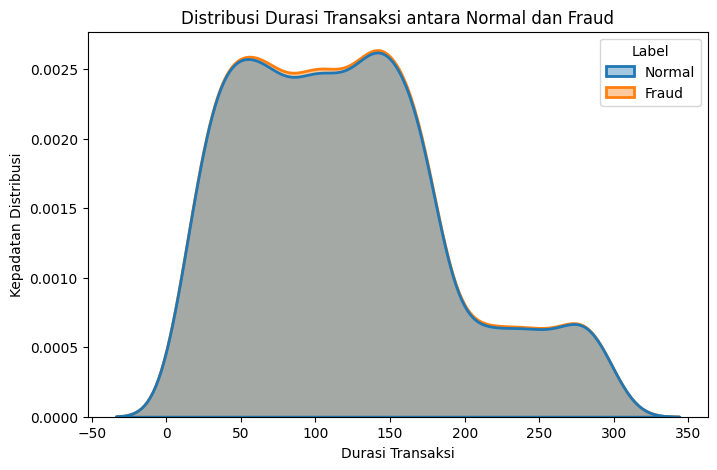

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    data=df_all,
    x='TransactionDuration',
    hue='Label',
    fill=True,
    alpha=0.4,
    linewidth=2
)
plt.title('Distribusi Durasi Transaksi antara Normal dan Fraud')
plt.xlabel('Durasi Transaksi')
plt.ylabel('Kepadatan Distribusi')
plt.show()





3. Distribusi Saldo Akun (AccountBalance)

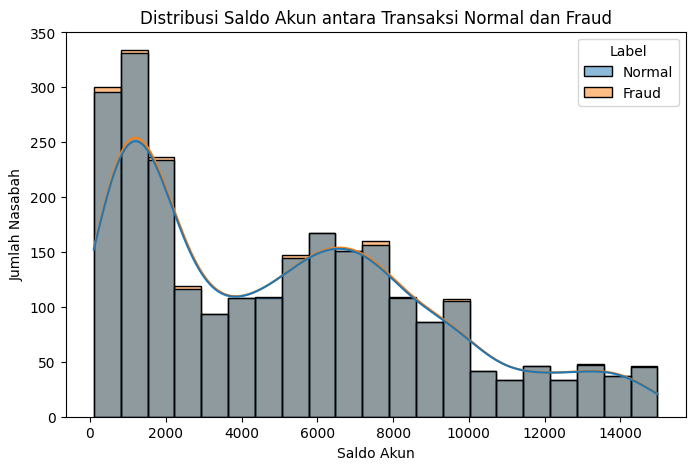

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_all, x='AccountBalance', hue='Label', kde=True)
plt.title('Distribusi Saldo Akun antara Transaksi Normal dan Fraud')
plt.xlabel('Saldo Akun')
plt.ylabel('Jumlah Nasabah')
plt.show()


# **4.Heatmap korelasi antar variabel numerik**

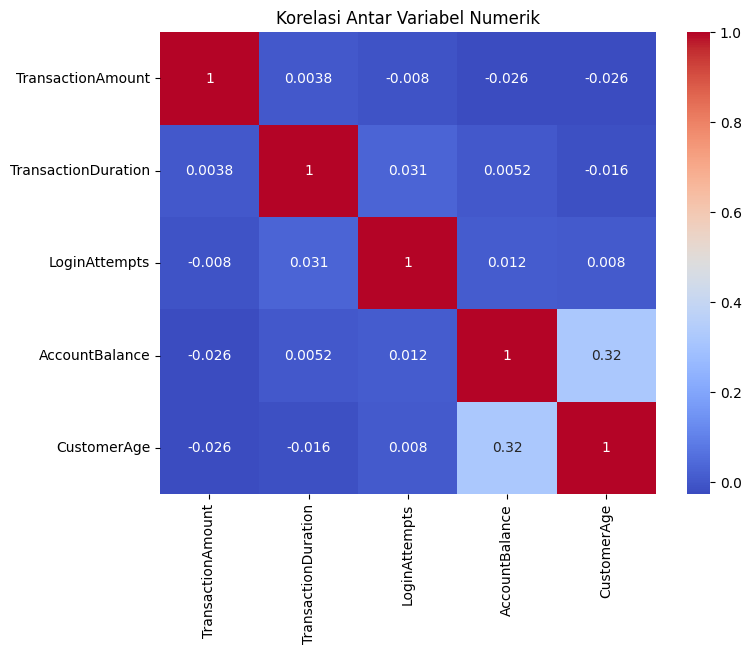

In [ ]:
# Heatmap korelasi antar variabel numerik
plt.figure(figsize=(8,6))
sns.heatmap(df_all[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# **5.Analisis tren waktu **

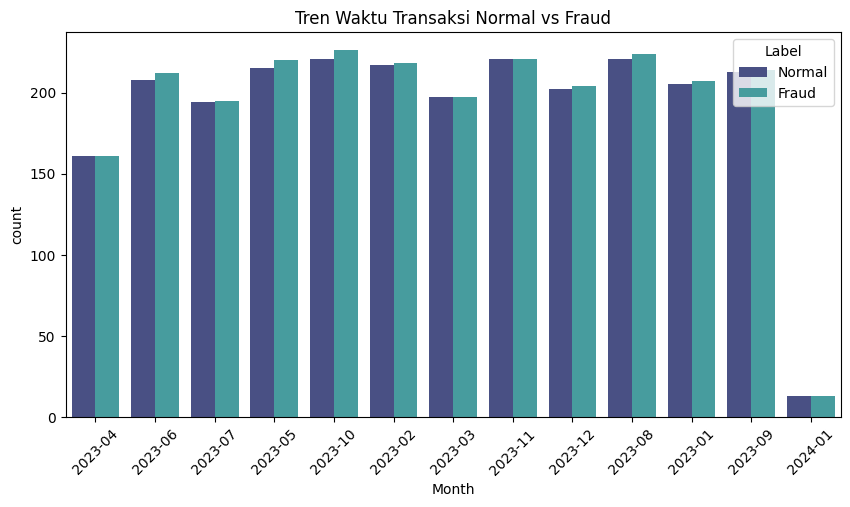

In [ ]:
# Analisis tren waktu (jika ada kolom tanggal)
if 'TransactionDate' in df_all.columns:
    df_all['Month'] = df_all['TransactionDate'].dt.to_period('M')
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_all, x='Month', hue='Label', palette='mako')
    plt.title('Tren Waktu Transaksi Normal vs Fraud')
    plt.xticks(rotation=45)
    plt.show()

# ***6.Tampilkan tabel korelasi***

In [ ]:
# Tampilkan tabel korelasi
print("📌 Korelasi Pearson:")
display(corr_pearson)
print("📌 Korelasi Kendall:")
display(corr_kendall)
print("📌 Korelasi Spearman:")
display(corr_spearman)

📌 Korelasi Pearson:


,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge
TransactionAmount,1.000000,0.003799,-0.007974,-0.026072,-0.025618
TransactionDuration,0.003799,1.000000,0.031276,0.005226,-0.016236
LoginAttempts,-0.007974,0.031276,1.000000,0.012016,0.007981
AccountBalance,-0.026072,0.005226,0.012016,1.000000,0.320054
CustomerAge,-0.025618,-0.016236,0.007981,0.320054,1.000000


📌 Korelasi Kendall:


,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge
TransactionAmount,1.000000,0.004777,0.000862,-0.017849,-0.013821
TransactionDuration,0.004777,1.000000,0.024786,0.002256,-0.010912
LoginAttempts,0.000862,0.024786,1.000000,0.008939,0.002404
AccountBalance,-0.017849,0.002256,0.008939,1.000000,0.259106
CustomerAge,-0.013821,-0.010912,0.002404,0.259106,1.000000


📌 Korelasi Spearman:


,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge
TransactionAmount,1.000000,0.006925,0.001052,-0.027212,-0.020335
TransactionDuration,0.006925,1.000000,0.030634,0.003572,-0.015997
LoginAttempts,0.001052,0.030634,1.000000,0.011018,0.002911
AccountBalance,-0.027212,0.003572,0.011018,1.000000,0.404801
CustomerAge,-0.020335,-0.015997,0.002911,0.404801,1.000000


# **7.Perbandingan pearson, kendal, spearman**

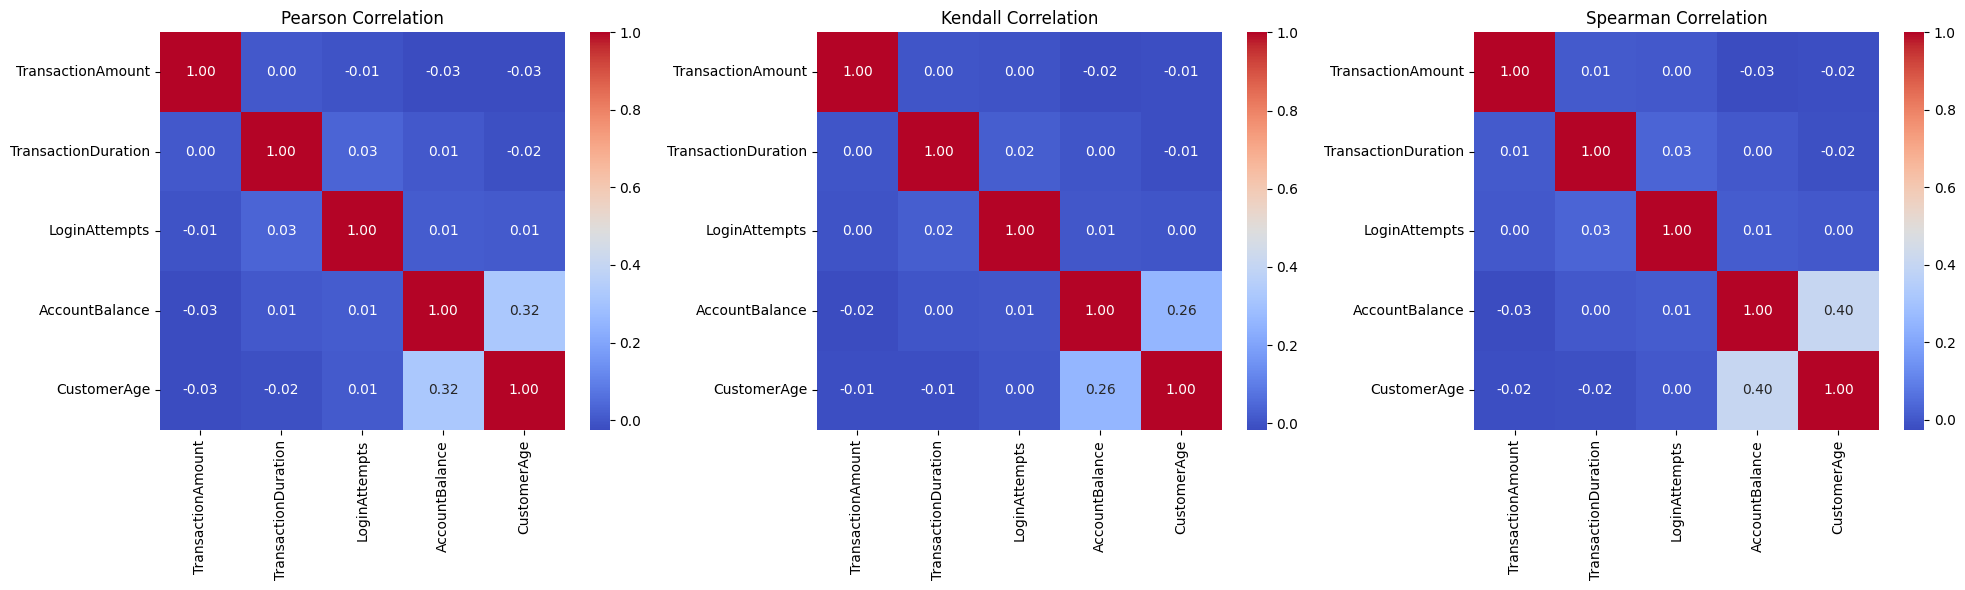

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Pearson Correlation')

sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Kendall Correlation')

sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2])
axes[2].set_title('Spearman Correlation')

plt.tight_layout()
plt.show()

# **8.Hasil korelasi**

In [ ]:
# ============================================================
# 🔹 TAMPILKAN HASIL KORELASI
# ============================================================
print("\n📈 Korelasi Pearson:")
print(corr_pearson)
print("\n📈 Korelasi Kendall:")
print(corr_kendall)
print("\n📈 Korelasi Spearman:")
print(corr_spearman)



📈 Korelasi Pearson:
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             1.000000             0.003799      -0.007974   
TransactionDuration           0.003799             1.000000       0.031276   
LoginAttempts                -0.007974             0.031276       1.000000   
AccountBalance               -0.026072             0.005226       0.012016   
CustomerAge                  -0.025618            -0.016236       0.007981   

                     AccountBalance  CustomerAge  
TransactionAmount         -0.026072    -0.025618  
TransactionDuration        0.005226    -0.016236  
LoginAttempts              0.012016     0.007981  
AccountBalance             1.000000     0.320054  
CustomerAge                0.320054     1.000000  

📈 Korelasi Kendall:
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             1.000000             0.004777       0.000862   
TransactionDuration        

# **9.Perbadingan jumlah transaksi normal vc fraud**

/tmp/ipython-input-3968408138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all, x='Label', palette='viridis')


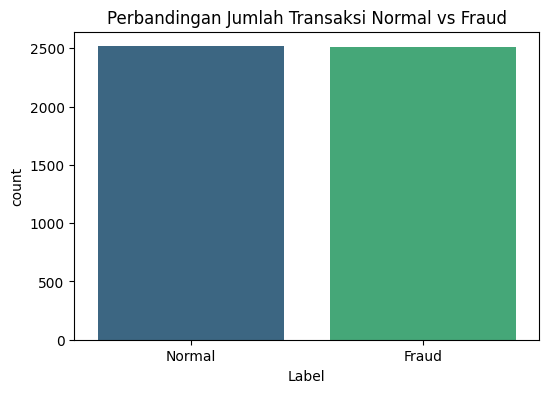

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_all, x='Label', palette='viridis')
plt.title('Perbandingan Jumlah Transaksi Normal vs Fraud')
plt.show()